In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [ ]:
'''
This dataset contains daily weather observations from numerous Australian weather stations.

The target variable RainTomorrow means: Did it rain the next day? Yes or No.

Columns:

Date: The date of observation
Location: The common name of the location of the weather station
MinTemp: The minimum temperature in degrees celsius
MaxTemp: The maximum temperature in degrees celsius
Rainfall: The amount of rainfall recorded for the day in mm
Evaporation: The so-called Class A pan evaporation (mm) in the 24 hours to 9am
Sunshine: The number of hours of bright sunshine in the day.
WindGustDir: The direction of the strongest wind gust in the 24 hours to midnight
WindGustSpeed: The speed (km/h) of the strongest wind gust in the 24 hours to midnight
WindDir9am: Direction of the wind at 9am
WindDir3pm: Direction of the wind at 3pm
WindSpeed9am: Wind speed (km/hr) averaged over 10 minutes prior to 9am
WindSpeed3pm: Wind speed (km/hr) averaged over 10 minutes prior to 3pm
Humidity9am: Humidity (percent) at 9am
Humidity3pm: Humidity (percent) at 3pm
Pressure9am: Atmospheric pressure (hpa) reduced to mean sea level at 9am
Pressure3pm: Atmospheric pressure (hpa) reduced to mean sea level at 3pm
Cloud9am: Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.
Cloud3pm: Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values
Temp9am: Temperature (degrees C) at 9am
Temp3pm: Temperature (degrees C) at 3pm
RainToday: Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
RISK_MM: The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk".
RainTomorrow: The target variable. Did it rain tomorrow?

Observations were drawn from numerous weather stations. 
The daily observations are available from http://www.bom.gov.au/climate/data. 
Copyright Commonwealth of Australia 2010, Bureau of Meteorology.

Definitions adapted from http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml
'''

## Data Acquistion

In [9]:
#Importing the dataset
weather = pd.read_csv("C:\\Users\hanan\Desktop\Berkeley\Introduction to Machine Learning Using Python\Assignments\Final Project\weatherAUS.csv")
weather.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


## Data Exploration / Data Manipulation / Analysis

In [10]:
weather.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [5]:
weather.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [6]:
weather.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

In [7]:
print('The shape of our features is:', weather.shape)

The shape of our features is: (142193, 24)


In [8]:
#Checking for missing data rates

NAs = pd.concat([round((weather.isnull().sum())/len(weather),2)], axis=1)
NAs

,0
Date,0.00
Location,0.00
MinTemp,0.00
MaxTemp,0.00
Rainfall,0.01
Evaporation,0.43
Sunshine,0.48
WindGustDir,0.07
WindGustSpeed,0.07
WindDir9am,0.07


In [9]:
# Dropping columns with high percentage of missing values, irrelevent columns and RISK_MM ("leaks" the answers to the model)

weather = weather.drop(columns=['Sunshine','Evaporation','Cloud3pm','Cloud9am','Location','RISK_MM','Date'],axis=1)

In [10]:
# Deleting all rows with missing values (we have enough data without them)

weather=weather.dropna()

In [11]:
print('The shape of our features after manipulation/cleaning is:', weather.shape)

The shape of our features after manipulation/cleaning is: (112925, 17)


In [12]:
#Checking for missing data again

NAs = pd.concat([weather.isnull().sum()], axis=1)
NAs

,0
MinTemp,0
MaxTemp,0
Rainfall,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0
WindDir3pm,0
WindSpeed9am,0
WindSpeed3pm,0
Humidity9am,0


In [13]:
#Creating boolean values for RainToday & RainTomorrow

weather['RainToday'] = weather['RainToday'].map({'Yes':1, 'No':0})
weather['RainTomorrow'] = weather['RainTomorrow'].map({'Yes':1, 'No':0})

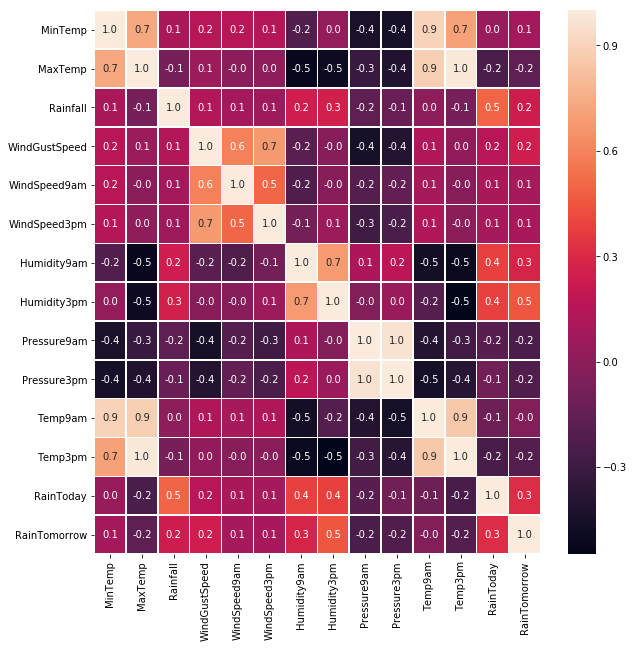

In [14]:
# Plotting the correlations heatmap

f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(weather.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [ ]:
# Dropping features with high correlation to other features

weather = weather.drop(columns=['Temp9am','Temp3pm'],axis=1)

'''
I have also tested the different algorithms without dropping these features.
Results were similar, but less good with most algorithms:

Logistic Regression
0.8514058003099402

Naive Bayes
0.819260571175559

KNN Classifier
0.8032322337834846

Random Forest
0.8492804959043613

Decision Tree
0.7736993579809608
'''

In [16]:
# Getting Dummies from all other categorical vars

weather = pd.get_dummies(weather,columns = ['WindGustDir','WindDir9am','WindDir3pm'],drop_first=True)

In [17]:
weather.head(10)

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0,1,0,0,0,0,0,0,0,0
5,14.6,29.7,0.2,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,...,0,0,0,0,0,0,0,1,0,0
6,14.3,25.0,0.0,50.0,20.0,24.0,49.0,19.0,1009.6,1008.2,...,0,0,0,0,0,0,0,1,0,0
7,7.7,26.7,0.0,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,...,0,0,0,0,0,0,0,1,0,0
8,9.7,31.9,0.0,80.0,7.0,28.0,42.0,9.0,1008.9,1003.6,...,0,1,0,0,0,0,0,0,0,0
9,13.1,30.1,1.4,28.0,15.0,11.0,58.0,27.0,1007.0,1005.7,...,0,0,0,0,1,0,0,0,0,0


In [18]:
#Checking for class inbalance

weather['RainTomorrow'].value_counts()/len(weather)

0    0.778446
1    0.221554
Name: RainTomorrow, dtype: float64

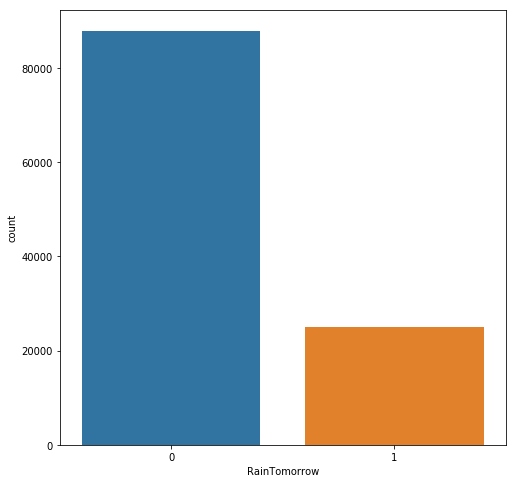

In [19]:
plt.figure(figsize=(8,8))
sns.countplot(data=weather,x='RainTomorrow')

In [ ]:
'''
There is some imbalance between the classes- since we have a lot of data, the algorithms should still work well.
I have also tried to stratify the train-test split, but results weren't better for most algorithms

Results with strasifying:

Logistic Regression
0.849236218729245

Naive Bayes
0.7298206774407793

KNN Classifier
0.8065530219172017

Random Forest
0.8549036971441222

Decision Tree
0.790081912773965
'''

In [21]:
#Scaling the data

from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaler.fit(weather)

weather=pd.DataFrame(scaler.transform(weather),columns=weather.columns)

weather.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,0.513064,0.446154,0.001632,0.289062,0.211765,0.258824,0.71,0.22,0.449587,0.4800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.370546,0.494505,0.000000,0.289062,0.023529,0.235294,0.44,0.25,0.497521,0.4912,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.501188,0.507692,0.000000,0.304688,0.200000,0.282353,0.38,0.30,0.447934,0.5056,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.413302,0.558242,0.000000,0.132812,0.105882,0.082353,0.45,0.16,0.613223,0.5712,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.610451,0.652747,0.002720,0.265625,0.058824,0.211765,0.82,0.33,0.500826,0.4624,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.541568,0.595604,0.000544,0.382812,0.200000,0.258824,0.55,0.23,0.474380,0.4528,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.534442,0.492308,0.000000,0.335938,0.211765,0.258824,0.49,0.19,0.480992,0.4976,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.377672,0.529670,0.000000,0.218750,0.047059,0.176471,0.48,0.19,0.543802,0.5280,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.425178,0.643956,0.000000,0.570312,0.058824,0.305882,0.42,0.09,0.469421,0.4240,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.505938,0.604396,0.003808,0.164062,0.152941,0.105882,0.58,0.27,0.438017,0.4576,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [22]:
y=weather['RainTomorrow']
x=weather.drop('RainTomorrow',axis=1)

In [23]:
# Split the data into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1576) 
x_train.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
92011,0.349169,0.404396,0.000000,0.101562,0.105882,0.082353,0.70,0.40,0.735537,0.7152,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52936,0.729216,0.758242,0.000000,0.304688,0.176471,0.235294,0.33,0.23,0.525620,0.5616,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
46371,0.394299,0.419780,0.000000,0.265625,0.082353,0.200000,0.86,0.64,0.652893,0.6544,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
76297,0.603325,0.575824,0.004353,0.234375,0.082353,0.258824,0.63,0.45,0.568595,0.5552,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11161,0.608076,0.628571,0.000000,0.187500,0.211765,0.129412,0.54,0.33,0.629752,0.6048,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [24]:
x_train.shape, y_train.shape

((90340, 56), (90340,))

# Principal Component Analysis (PCA)

In [25]:
from sklearn.decomposition import PCA
pca = PCA()  
x_train = pca.fit_transform(x_train)  
x_test = pca.transform(x_test)  

In [26]:
explained_variance = pca.explained_variance_ratio_ 
explained_variance

array([0.06909204, 0.0496426 , 0.04003665, 0.03692508, 0.03431327,
       0.03150174, 0.02918736, 0.02674942, 0.02567445, 0.02514699,
       0.02414412, 0.02353358, 0.02336725, 0.02318006, 0.02273402,
       0.02251811, 0.02179319, 0.02163505, 0.02123655, 0.02039245,
       0.01998323, 0.01979746, 0.0196545 , 0.01950488, 0.01916112,
       0.01890565, 0.01877704, 0.01858536, 0.01832079, 0.01764869,
       0.01727408, 0.01689687, 0.01665539, 0.01627182, 0.01600373,
       0.01573446, 0.01419598, 0.01331887, 0.01318088, 0.01140869,
       0.01119264, 0.01058632, 0.00994615, 0.00712496, 0.00672828,
       0.00596104, 0.00385686, 0.00327993, 0.00182543, 0.00152279,
       0.00118838, 0.00094925, 0.00082535, 0.00069368, 0.00013501,
       0.00010046])

Text(0.5, 1.0, 'variance')

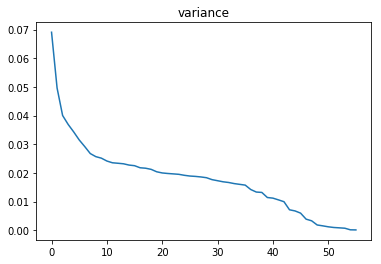

In [27]:
pcs = {'PC1','PC2','PC3','PC4','PC5'}
plt.plot(explained_variance)
plt.title("variance")

In [28]:
'''
It seems like there are no distinct features that are responsible for a major part of the variance in the dataset.
When testing the results after applying PCA, the accuracy of the model decreased from ~0.85 to ~0.77
'''

# Trying Different Models

## Decision Tree

In [29]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
pred_dt = dt_model.predict(x_test)
train_dt=dt_model.predict(x_train)

Accuracy Score: 1.0


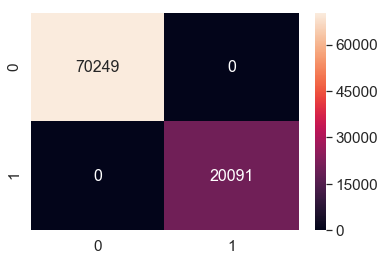

In [30]:
# plot confusion matrix for training data

cm = confusion_matrix(y_train, train_dt)
df_cm = pd.DataFrame(cm, range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')

print('Accuracy Score:' ,accuracy_score(y_train, train_dt))  

Accuracy Score: 0.7784812928935134


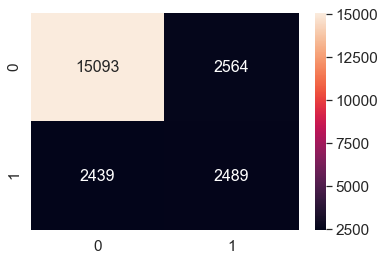

In [31]:
# plot confusion matrix for testing data

cm = confusion_matrix(y_test, pred_dt)
df_cm = pd.DataFrame(cm, range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')

print('Accuracy Score:' ,accuracy_score(y_test, pred_dt))  

In [32]:
print(metrics.classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

         0.0       0.86      0.85      0.86     17657
         1.0       0.49      0.51      0.50      4928

   micro avg       0.78      0.78      0.78     22585
   macro avg       0.68      0.68      0.68     22585
weighted avg       0.78      0.78      0.78     22585



Text(0, 0.5, 'True Positive Rate')

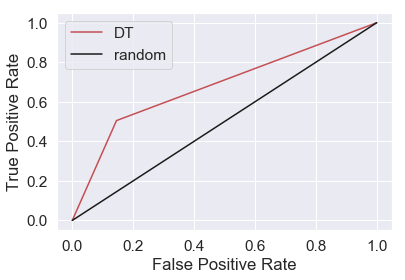

In [33]:
#Plotting the ROC curve, to help with understanding the balance between true-positive rate and false-positive rates

from sklearn.metrics import roc_curve
fpr_DT, tpr_DT, thresholds_DT = roc_curve(y_test, pred_dt)
plt.plot(fpr_DT, tpr_DT,'r-',label = 'DT')
plt.plot([0,1],[0,1],'k-',label='random')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [34]:
print("Thresholds: ", thresholds_DT)
print("False Positive Rates: ", fpr_DT.round(2))
print("True Positive Rates: ", tpr_DT.round(2))

Thresholds:  [2. 1. 0.]
False Positive Rates:  [0.   0.15 1.  ]
True Positive Rates:  [0.   0.51 1.  ]


## Random Forest

In [35]:
rf_model = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', oob_score = True) 
rf_model.fit(x_train, y_train)
pred_rf = rf_model.predict(x_test)
train_rf = rf_model.predict(x_train)

Accuracy Score: 0.999988930706221


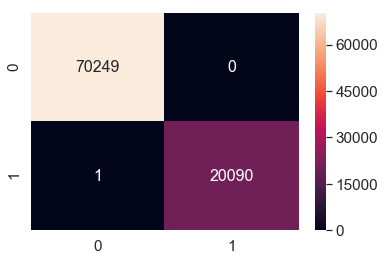

In [36]:
# plot confusion matrix for training data

cm = confusion_matrix(y_train, train_rf)
df_cm = pd.DataFrame(cm, range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')

print('Accuracy Score:' ,accuracy_score(y_train, train_rf))  

Accuracy Score: 0.8508744742085455


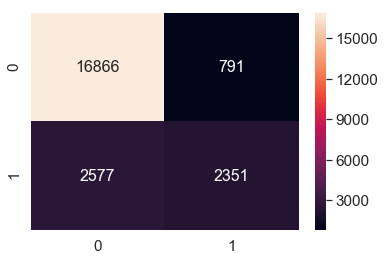

In [37]:
# plot confusion matrix for testing data

cm = confusion_matrix(y_test, pred_rf)
df_cm = pd.DataFrame(cm, range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')

print('Accuracy Score:' ,accuracy_score(y_test, pred_rf))  

In [38]:
print(metrics.classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91     17657
         1.0       0.75      0.48      0.58      4928

   micro avg       0.85      0.85      0.85     22585
   macro avg       0.81      0.72      0.75     22585
weighted avg       0.84      0.85      0.84     22585



Text(0, 0.5, 'True Positive Rate')

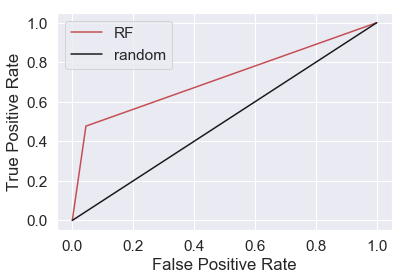

In [39]:
#Plotting the ROC curve, to help with understanding the balance between true-positive rate and false-positive rates

fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test, pred_rf)
plt.plot(fpr_RF, tpr_RF,'r-',label = 'RF')
plt.plot([0,1],[0,1],'k-',label='random')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [40]:
print("Thresholds: ", thresholds_RF)
print("False Positive Rates: ", fpr_RF.round(2))
print("True Positive Rates: ", tpr_RF.round(2))

Thresholds:  [2. 1. 0.]
False Positive Rates:  [0.   0.04 1.  ]
True Positive Rates:  [0.   0.48 1.  ]


## KNN Classifier

In [41]:
knn_model = KNeighborsClassifier(n_neighbors=3)  
knn_model.fit(x_train, y_train)
pred_knn=knn_model.predict(x_test)
train_knn=knn_model.predict(x_train)

Accuracy Score: 0.8882776178879788


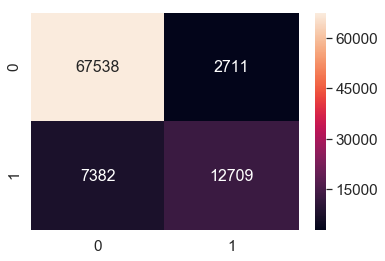

In [42]:
# plot confusion matrix for training data

cm = confusion_matrix(y_train, train_knn)
df_cm = pd.DataFrame(cm, range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')

print('Accuracy Score:' ,accuracy_score(y_train, train_knn))  

Accuracy Score: 0.8044277175116228


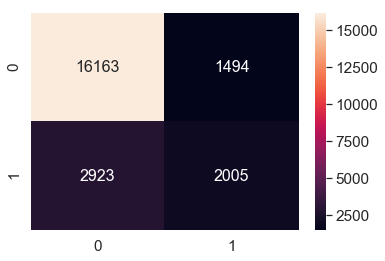

In [43]:
# plot confusion matrix for testing data

cm = confusion_matrix(y_test, pred_knn)
df_cm = pd.DataFrame(cm, range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')

print('Accuracy Score:' ,accuracy_score(y_test, pred_knn))  

In [44]:
print(metrics.classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

         0.0       0.85      0.92      0.88     17657
         1.0       0.57      0.41      0.48      4928

   micro avg       0.80      0.80      0.80     22585
   macro avg       0.71      0.66      0.68     22585
weighted avg       0.79      0.80      0.79     22585



In [45]:
# Due to the (very) long processing time of the KNN Classifier, I did not test any other K values

Text(0, 0.5, 'True Positive Rate')

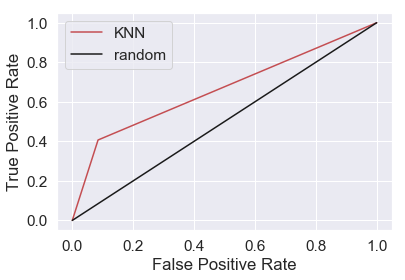

In [46]:
#Plotting the ROC curve, to help with understanding the balance between true-positive rate and false-positive rates

fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_test, pred_knn)
plt.plot(fpr_KNN, tpr_KNN,'r-',label = 'KNN')
plt.plot([0,1],[0,1],'k-',label='random')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [47]:
print("Thresholds: ", thresholds_KNN)
print("False Positive Rates: ", fpr_KNN.round(2))
print("True Positive Rates: ", tpr_KNN.round(2))

Thresholds:  [2. 1. 0.]
False Positive Rates:  [0.   0.08 1.  ]
True Positive Rates:  [0.   0.41 1.  ]


## Naive Bayes

In [48]:
gnb_model=GaussianNB()
gnb_model.fit(x_train, y_train)
pred_gnb=gnb_model.predict(x_test)
train_gnb=gnb_model.predict(x_train)

Accuracy Score: 0.8163161390303298


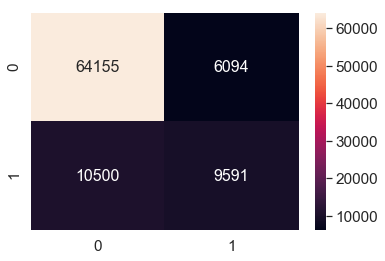

In [49]:
# plot confusion matrix for training data

cm = confusion_matrix(y_train, train_gnb)
df_cm = pd.DataFrame(cm, range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')

print('Accuracy Score:' ,accuracy_score(y_train, train_gnb))  

Accuracy Score: 0.8175780385211423


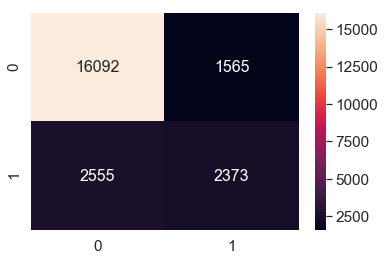

In [50]:
# plot confusion matrix for testing data

cm = confusion_matrix(y_test, pred_gnb)
df_cm = pd.DataFrame(cm, range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')

print('Accuracy Score:' ,accuracy_score(y_test, pred_gnb))  

In [51]:
print(metrics.classification_report(y_test, pred_gnb))

              precision    recall  f1-score   support

         0.0       0.86      0.91      0.89     17657
         1.0       0.60      0.48      0.54      4928

   micro avg       0.82      0.82      0.82     22585
   macro avg       0.73      0.70      0.71     22585
weighted avg       0.81      0.82      0.81     22585



Text(0, 0.5, 'True Positive Rate')

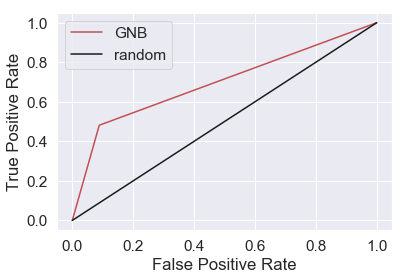

In [52]:
#Plotting the ROC curve, to help with understanding the balance between true-positive rate and false-positive rates

fpr_GNB, tpr_GNB, thresholds_GNB = roc_curve(y_test, pred_gnb)
plt.plot(fpr_GNB, tpr_GNB,'r-',label = 'GNB')
plt.plot([0,1],[0,1],'k-',label='random')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [53]:
print("Thresholds: ", thresholds_GNB)
print("False Positive Rates: ", fpr_GNB.round(2))
print("True Positive Rates: ", tpr_GNB.round(2))

Thresholds:  [2. 1. 0.]
False Positive Rates:  [0.   0.09 1.  ]
True Positive Rates:  [0.   0.48 1.  ]


## Logistic Regression

In [54]:
lr_model=LogisticRegression()
lr_model.fit(x_train, y_train)
pred_lr=lr_model.predict(x_test)
train_lr=lr_model.predict(x_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy Score: 0.8493801195483728


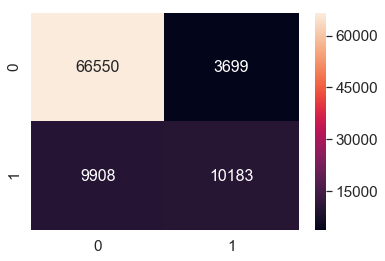

In [55]:
# plot confusion matrix for training data

cm = confusion_matrix(y_train, train_lr)
df_cm = pd.DataFrame(cm, range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')

print('Accuracy Score:' ,accuracy_score(y_train, train_lr))  

Accuracy Score: 0.8514058003099402


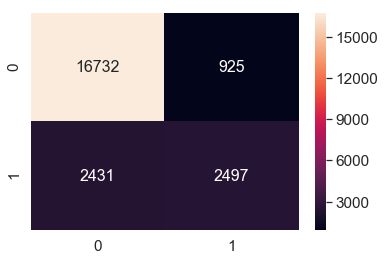

In [56]:
# plot confusion matrix for testing data

cm = confusion_matrix(y_test, pred_lr)
df_cm = pd.DataFrame(cm, range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')

print('Accuracy Score:' ,accuracy_score(y_test, pred_lr))  

In [57]:
print(metrics.classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     17657
         1.0       0.73      0.51      0.60      4928

   micro avg       0.85      0.85      0.85     22585
   macro avg       0.80      0.73      0.75     22585
weighted avg       0.84      0.85      0.84     22585



In [58]:
accuracy = cross_val_score(lr_model, x, y, cv = 10, scoring='accuracy').mean()
print("Accuracy {}".format(accuracy))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Accuracy 0.8466862885407785


In [59]:
#We can see the accuracy went down using K-Fold cross validation

Text(0, 0.5, 'True Positive Rate')

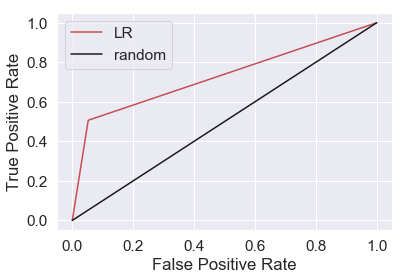

In [60]:
#Plotting the ROC curve, to help with understanding the balance between true-positive rate and false-positive rates

fpr_LR, tpr_LR, thresholds_LR = roc_curve(y_test, pred_lr)
plt.plot(fpr_LR, tpr_LR,'r-',label = 'LR')
plt.plot([0,1],[0,1],'k-',label='random')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [61]:
print("Thresholds: ", thresholds_LR)
print("False Positive Rates: ", fpr_LR.round(2))
print("True Positive Rates: ", tpr_LR.round(2))

Thresholds:  [2. 1. 0.]
False Positive Rates:  [0.   0.05 1.  ]
True Positive Rates:  [0.   0.51 1.  ]
